## EDA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

In [2]:
def clean_data(data : pd.DataFrame, drop_duplicates : bool = True, drop_missing : bool = True) -> pd.DataFrame:
    data_frame = data
    if drop_duplicates:
        data_frame = data_frame.drop_duplicates()
    if drop_missing:
        data_frame = data_frame.dropna()
    return data_frame

def split_columns(data_frame : pd.DataFrame) -> tuple[list, list]:
    numeric_columns = data_frame.select_dtypes(include=[np.number]).columns.tolist()
    print("Numeric columns:", numeric_columns)
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    print("Categorical columns:", categorical_columns)


    return numeric_columns, categorical_columns

def encode_categorical_features(df, categorical_columns):
    
    df_encoded = df.copy()  # Create a copy to avoid modifying the original DataFrame
    label_encoders = {}  # Dictionary to store label encoders for each column
    
    for col in categorical_columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le  # Store the label encoder for later use (e.g., inverse transform)
    
    return df_encoded



In [3]:
df = pd.read_csv('data/raw/StudentPerformanceFactors.csv')
df = clean_data(df)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
numeric_variables, categorical_variables = split_columns(df)

Numeric columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


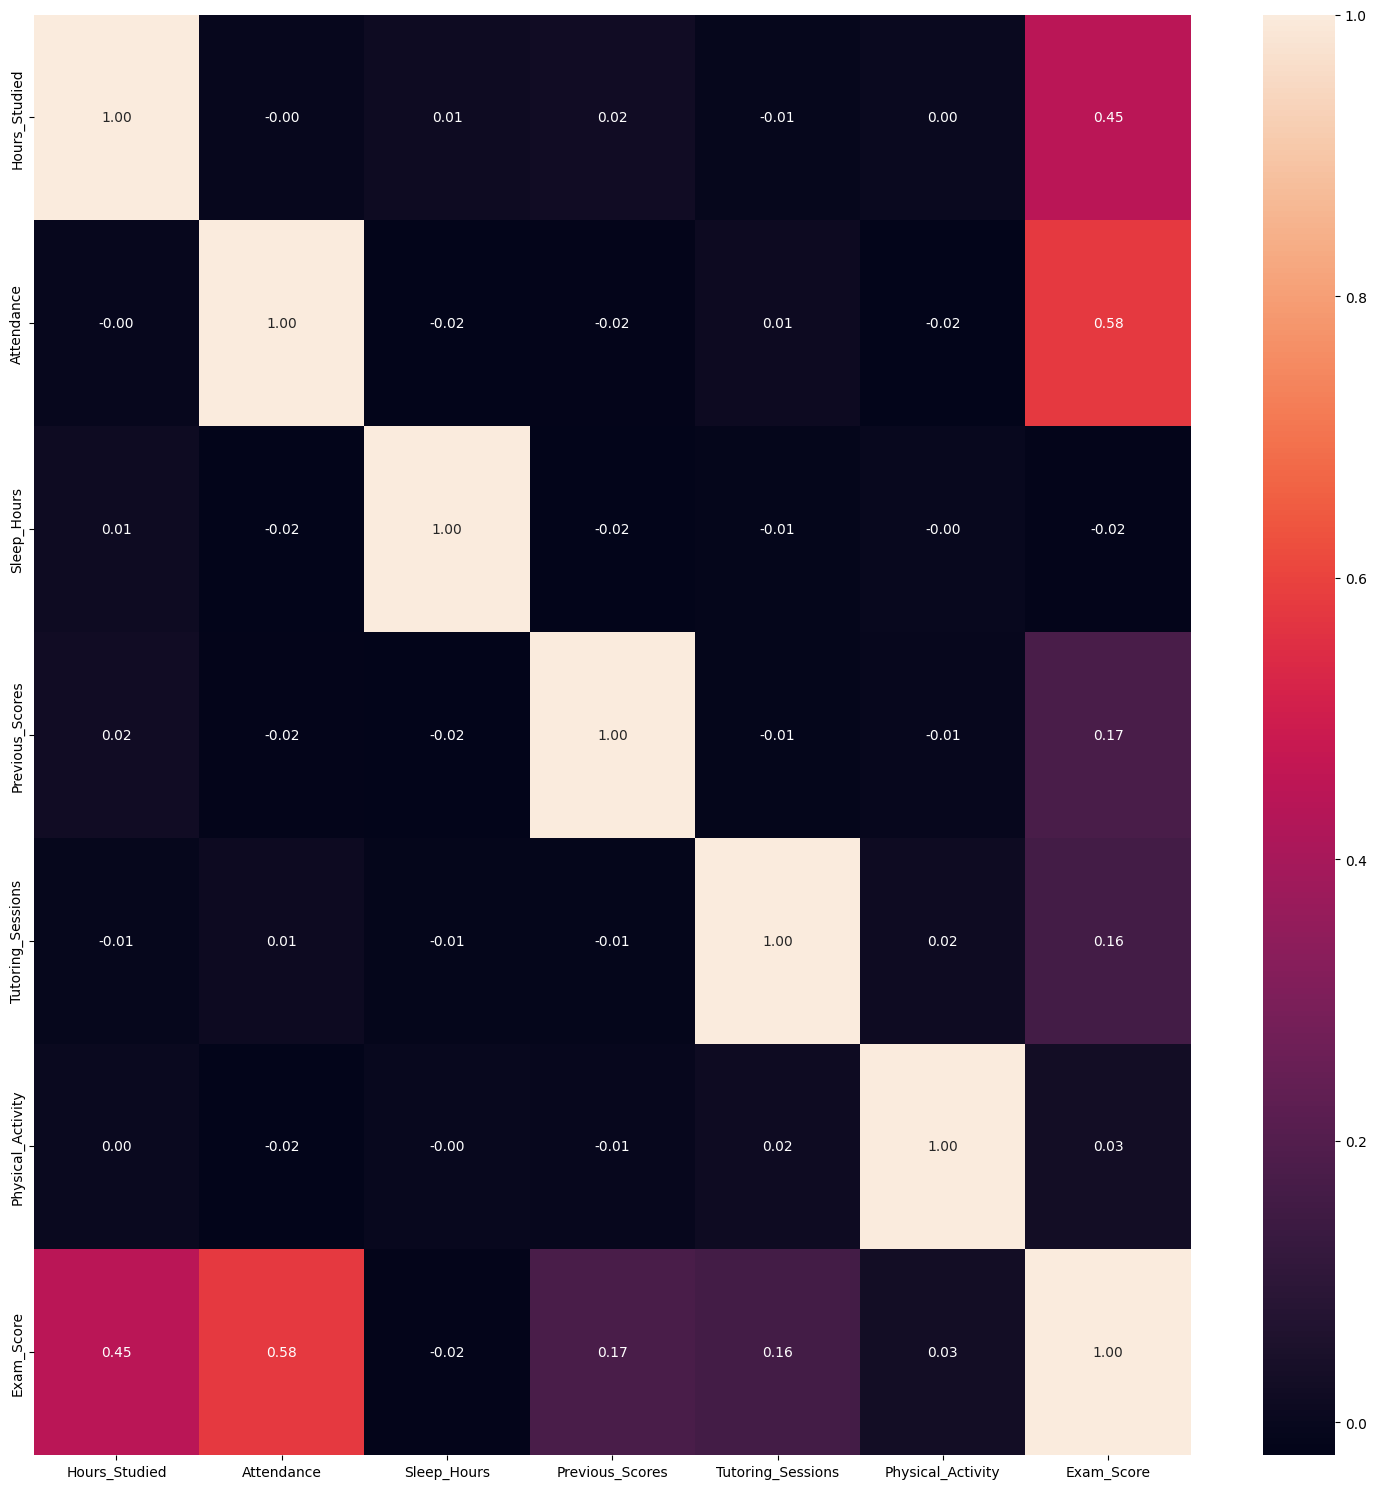

In [5]:
#HEATMAP

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[numeric_variables].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

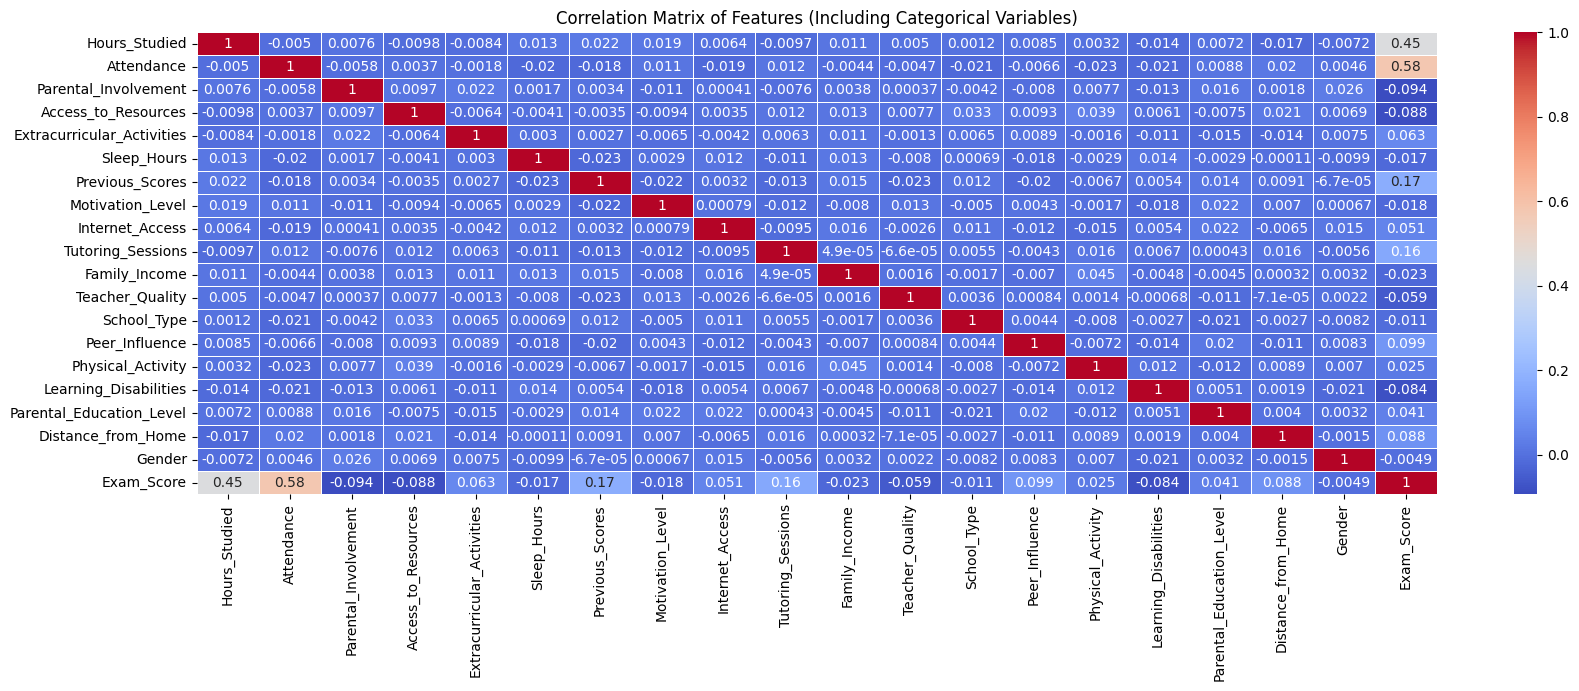

In [6]:
df_encoded = encode_categorical_features(df, categorical_variables)
corr = df_encoded.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features (Including Categorical Variables)')
plt.show()

After analyzing the data, the most impactful features are: Hours_Studied(per week), Attendance(percentage), Previous_Scores(previous test), Tutoring_Sessions(per month)

In [7]:
df = df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']]
df

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
0,23,84,73,0,67
1,19,64,59,2,61
2,24,98,91,2,74
3,29,89,98,1,71
4,19,92,65,3,70
...,...,...,...,...,...
6602,25,69,76,1,68
6603,23,76,81,3,69
6604,20,90,65,3,68
6605,10,86,91,2,68


In [8]:
#Saving the clean data
df.to_pickle('data/clean/StudentPerformanceFactors.pkl')